In [20]:
import os
import numpy as np
from PIL import Image
from google.cloud import storage

import sys
import importlib

def call_module(nm, path):
    spec = importlib.util.spec_from_file_location(nm, path)
    foo = importlib.util.module_from_spec(spec)
    sys.modules[nm] = foo
    spec.loader.exec_module(foo)
    return foo

In [21]:
def download_files_from_folder(bucket_name, bucket_fd, local_fd, files):
    """Download all files from a folder in a Google Cloud Storage bucket."""
    # Initialize a client
    client = storage.Client()
    # Get the bucket
    bucket = client.bucket(bucket_name)
    # List all blobs (files) in the specified folder
    for file in files:
        blob = bucket.blob(f"{bucket_fd}/{file}")
        blob.download_to_filename(f"{local_fd}/{file}")

In [22]:
model_type = 'vanilla_fontdiffuser_training_phase_1'
model_i = '430000'
files_dict = {
    'unet': f"{model_type}__unet_{model_i}.pth",
    'content_encoder': f"{model_type}__content_encoder_{model_i}.pth",
    'style_encoder': f"{model_type}__style_encoder_{model_i}.pth",
}
local_fd = "/home/jupyter/ai_font/data/model"
os.makedirs(local_fd, exist_ok=True)
download_files_from_folder("leo_font","experiments",local_fd,list(files_dict.values()))

In [23]:
fd = "/home/jupyter/ai_font/experiments/sample"
module_fd = "/home/jupyter/ai_font/experiments/font_diffuser"
args = call_module('args', f"{fd}/args.py")
SampleArgs = args.SampleArgs

sample = call_module('sample', f"{fd}/sample.py")
load_fontdiffuser_pipeline = sample.load_fontdiffuser_pipeline
sampling = sample.sampling

In [24]:
args = SampleArgs()
modelpaths = {k:f"{local_fd}/{v}" for k,v in files_dict.items()}

In [25]:
pipe = load_fontdiffuser_pipeline(args, module_fd, modelpaths)

Load the down block  DownBlock2D
Load the down block  MCADownBlock2D
The style_attention cross attention dim in Down Block 1 layer is 1024
The style_attention cross attention dim in Down Block 2 layer is 1024
Load the down block  MCADownBlock2D
The style_attention cross attention dim in Down Block 1 layer is 1024
The style_attention cross attention dim in Down Block 2 layer is 1024
Load the down block  DownBlock2D
Load the up block  UpBlock2D
Load the up block  StyleRSIUpBlock2D
Load the up block  StyleRSIUpBlock2D
Load the up block  UpBlock2D
Param count for Ds initialized parameters: 20591296
Get CG-GAN Style Encoder!
Param count for Ds initialized parameters: 1187008
Get CG-GAN Content Encoder!
Loaded the model state_dict successfully!
Loaded training DDPM scheduler sucessfully!
Loaded dpm_solver pipeline sucessfully!


In [16]:
style_files = [f for f in os.listdir(f"{args.data_fd}/unseen/") if args.test_fonts[3] in f]

In [19]:
# 글자와 언신 스타일을 섞어서 다 찍어내기
savefd = "/home/jupyter/ai_font/data/report"
os.makedirs(savefd, exist_ok=True)

In [ ]:
for font in args.test_fonts:
    styles = [int(f.split("__")[-1].replace(".png","")) for f in os.listdir(f"{args.data_fd}/seen/") if font in f][:100]
    for c in args.seens_ids:
        for s in styles:
            if c != s:
                savepath = f"{savefd}/{font}__seen__c{c}_s{s}.png"
                img = sampling(
                    args=args, 
                    pipe=pipe, 
                    content_image=Image.open(f"{args.data_fd}/seen/gulim__{c}.png").convert("RGB"),
                    style_image=Image.open(f"{args.data_fd}/seen/{font}__{s}.png").convert("RGB"),
                            )
                img.save(savepath)
                print(savepath)
    for c in args.unseens_ids:
        for s in styles:
            if c != s:
                savepath = f"{savefd}/{font}__unseen__c{c}_s{s}.png"
                img = sampling(
                    args=args, 
                    pipe=pipe, 
                    content_image=Image.open(f"{args.data_fd}/seen/gulim__{c}.png").convert("RGB"),
                    style_image=Image.open(f"{args.data_fd}/seen/{font}__{s}.png").convert("RGB"),
                            )
                img.save(savepath)
                print(savepath)

Sampling by DPM-Solver++ ......
/home/jupyter/ai_font/data/report/twice dahyun_4__seen__c1288_s1967.png
Sampling by DPM-Solver++ ......
/home/jupyter/ai_font/data/report/twice dahyun_4__seen__c1288_s9259.png
Sampling by DPM-Solver++ ......
/home/jupyter/ai_font/data/report/twice dahyun_4__seen__c1288_s7812.png
Sampling by DPM-Solver++ ......
/home/jupyter/ai_font/data/report/twice dahyun_4__seen__c1288_s3631.png
Sampling by DPM-Solver++ ......
/home/jupyter/ai_font/data/report/twice dahyun_4__seen__c1288_s1047.png
Sampling by DPM-Solver++ ......
/home/jupyter/ai_font/data/report/twice dahyun_4__seen__c1288_s300.png
Sampling by DPM-Solver++ ......
/home/jupyter/ai_font/data/report/twice dahyun_4__seen__c1288_s8002.png
Sampling by DPM-Solver++ ......
/home/jupyter/ai_font/data/report/twice dahyun_4__seen__c1288_s1780.png
Sampling by DPM-Solver++ ......
/home/jupyter/ai_font/data/report/twice dahyun_4__seen__c1288_s6498.png
Sampling by DPM-Solver++ ......
/home/jupyter/ai_font/data/report

In [9]:
args.data_fd

'/home/jupyter/ai_font/data/zipfiles/raw/size96'

Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/seen/UhBee Sunhong__2107.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/seen/UhBee Howl__2107.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/unseen/UhBee Sunhong__8316.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/unseen/UhBee Howl__8316.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/seen/UhBee Sunhong__9012.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/unseen/UhBee Sunhong__9545.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/seen/UhBee Howl__9012.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/unseen/UhBee Howl__9545.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/seen/UhBee Sunhong__10526.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/seen/UhBee Howl__10526.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/seen/UhBee Sunhong__1241.png
Not Appended: /

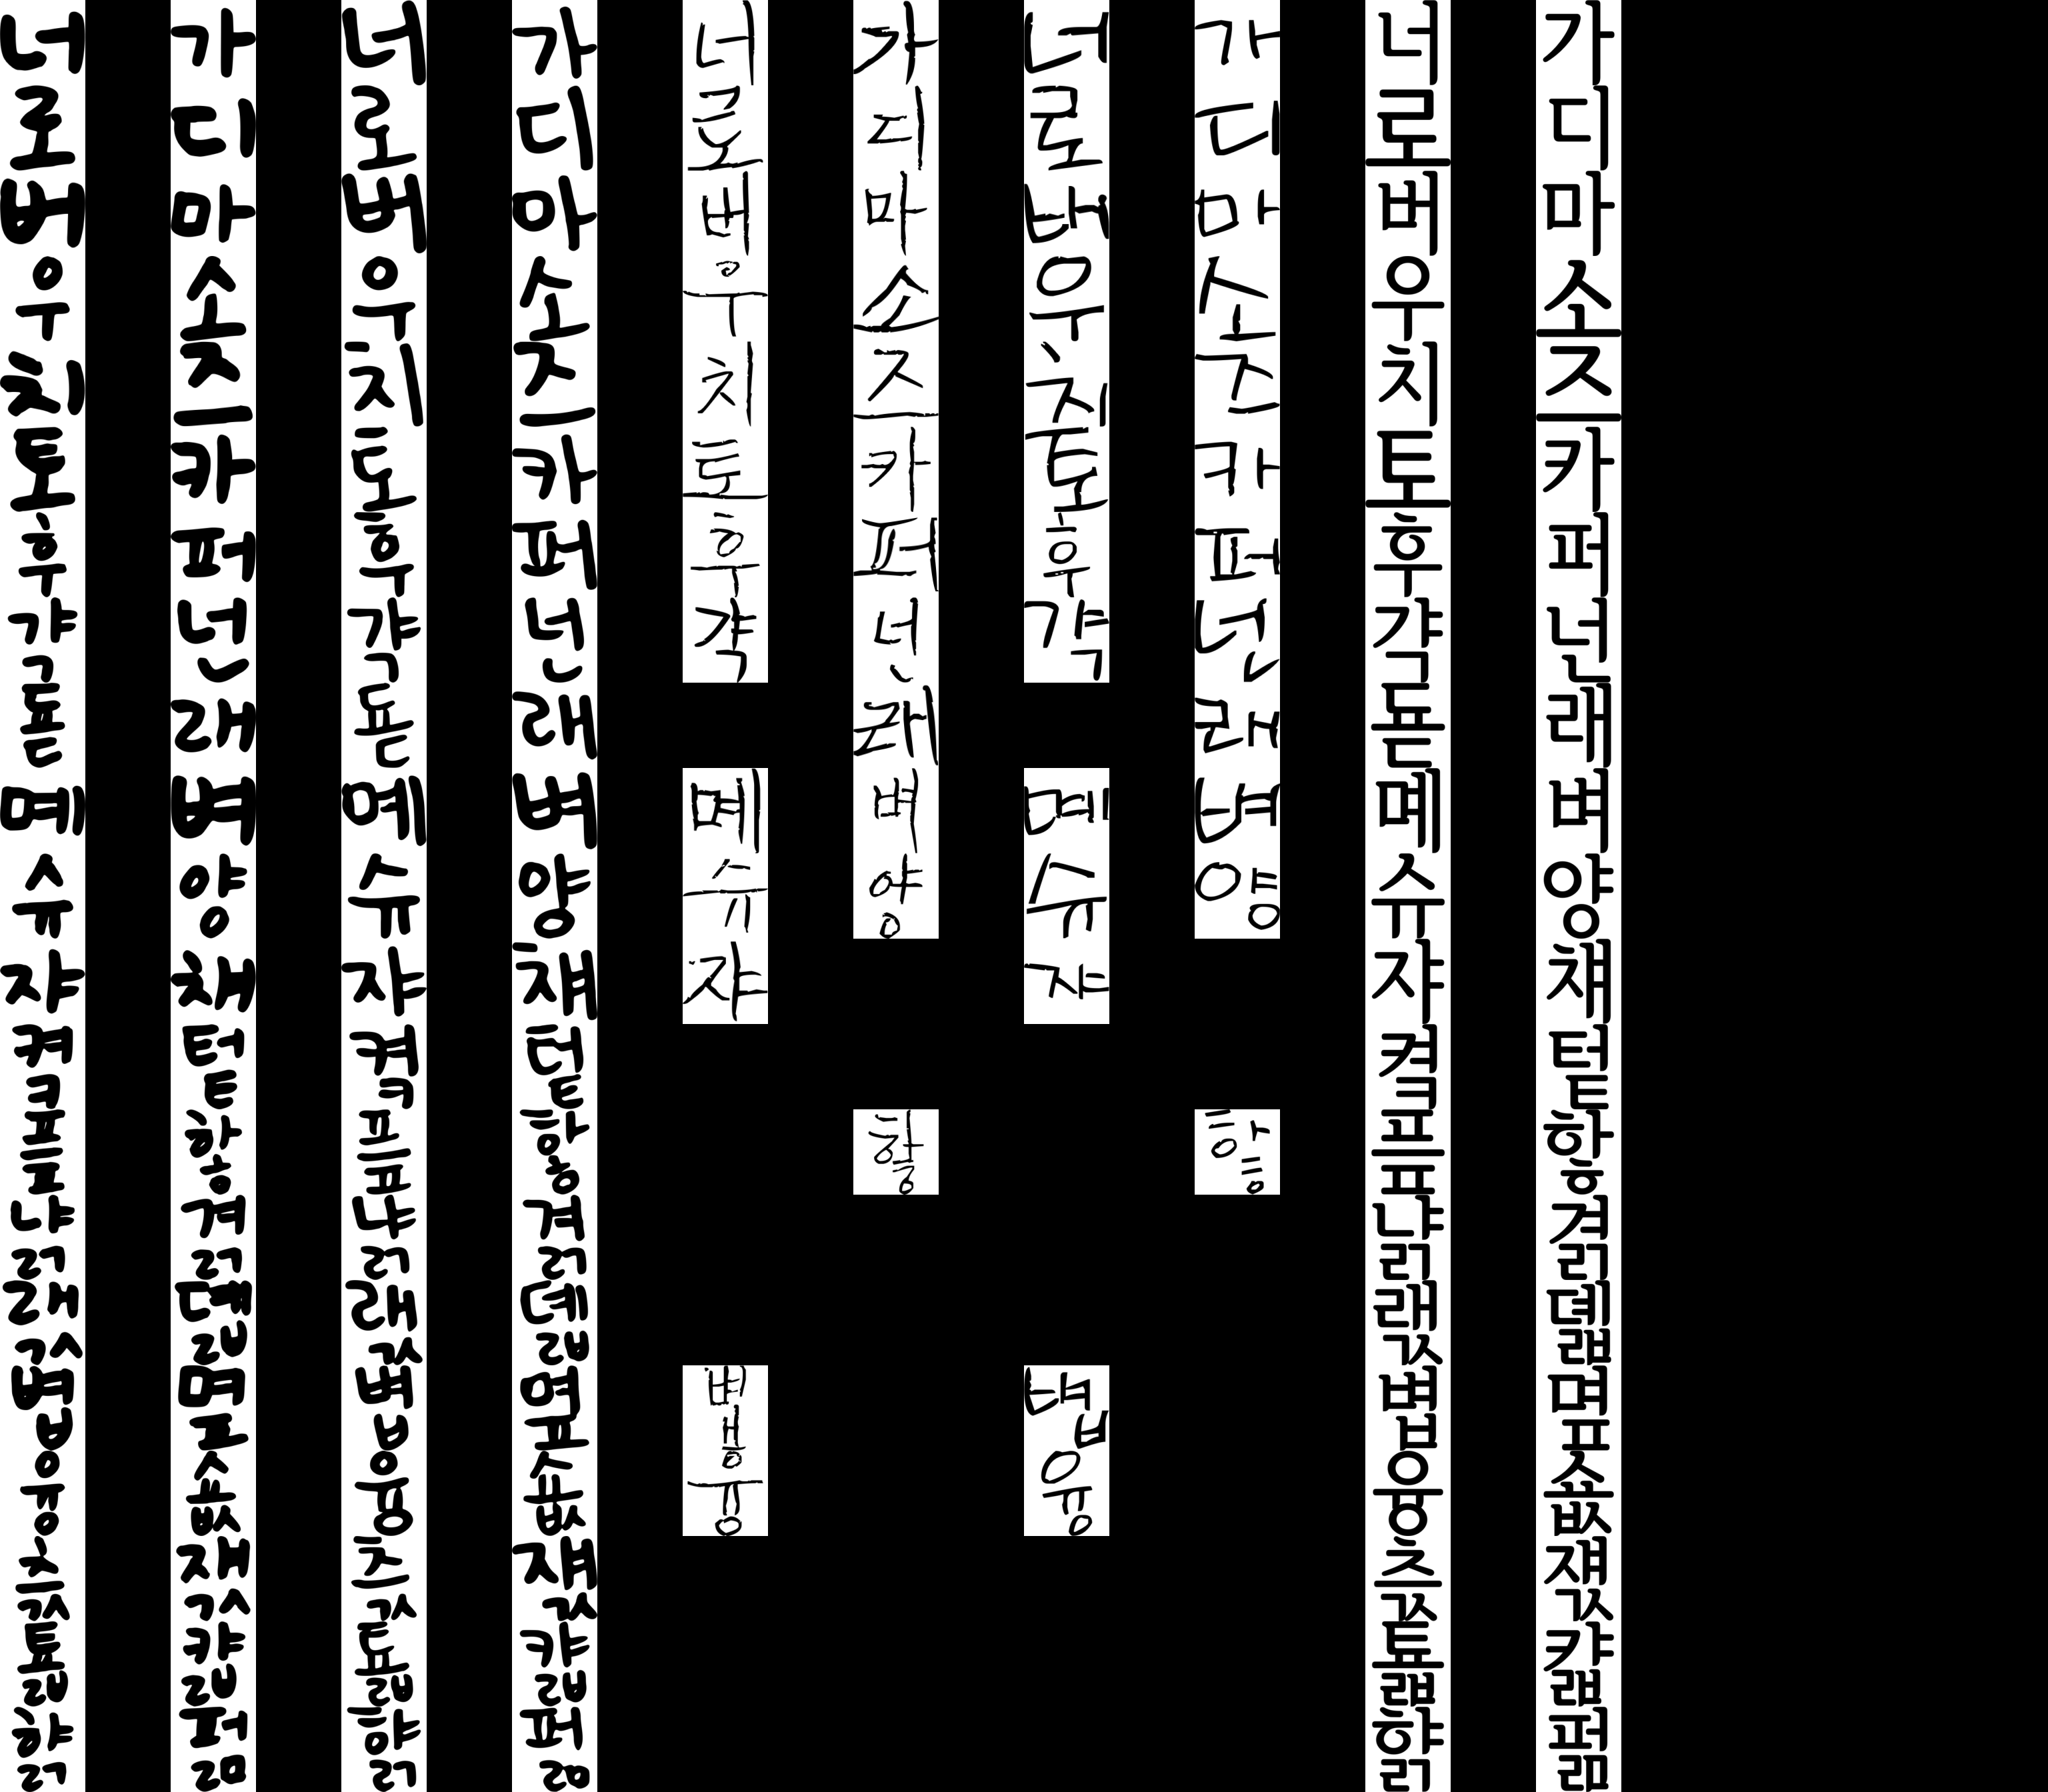

In [7]:
bigimg = ImageConcat(n_h=4*len(args.test_fonts), n_v=len(args.seens), resolution=128)
for si, usi in zip(args.seens_ids, args.unseens_ids):
    for font in args.test_fonts[:-1]:
        # Seen True
        bigimg.append_img(f"{args.data_fd}/seen/{font}__{si}.png")
        bigimg.move_cursor_h()
        # Seen Generated
        
        bigimg.move_cursor_h()
        # Unseen True
        bigimg.append_img(f"{args.data_fd}/unseen/{font}__{usi}.png")
        bigimg.move_cursor_h()
        # Unseen Generated
        bigimg.move_cursor_h()
        # go down
    bigimg.reset_cursor_h()
    bigimg.move_cursor_v()
bigimg.img

In [38]:
args.data_fd

'/home/jupyter/ai_font/data/zipfiles/raw/size96'

In [39]:
Image.open(f"{args.data_fd}/unseen/twice dahyun_4__1292.png").convert('RGB').size

(128, 128)

In [ ]:
for ci in content_is:
    content_image = Image.open("data/r40202/pngs/gulim__%s.png"%str(ci)).convert('RGB')
    style_image = Image.open("data/r40202/pngs/%s__%s.png"%(str(style), str(style_i))).convert('RGB')
    out_image = sampling(
        args=args, 
        pipe=pipe, 
        content_image=content_image,
        style_image=style_image,
    )

In [17]:
args.seens_ids

[1288,
 3164,
 4228,
 6832,
 8792,
 9632,
 10948,
 57,
 2107,
 3724,
 5768,
 7112,
 9012,
 10526,
 1241,
 2971,
 4301,
 6965,
 8739,
 9755,
 10649]

In [15]:
[f for f in os.listdir('/home/jupyter/ai_font/data/zipfiles/raw/size96/unseen/') if "twice dahyun_4__" in f]

['twice dahyun_4__1292.png',
 'twice dahyun_4__8820.png',
 'twice dahyun_4__1971.png',
 'twice dahyun_4__6545.png',
 'twice dahyun_4__5646.png',
 'twice dahyun_4__177.png',
 'twice dahyun_4__8316.png',
 'twice dahyun_4__2968.png',
 'twice dahyun_4__4284.png',
 'twice dahyun_4__0.png',
 'twice dahyun_4__8887.png',
 'twice dahyun_4__9545.png',
 'twice dahyun_4__10118.png',
 'twice dahyun_4__7560.png',
 'twice dahyun_4__10611.png',
 'twice dahyun_4__3528.png',
 'twice dahyun_4__3722.png',
 'twice dahyun_4__2324.png',
 'twice dahyun_4__5516.png',
 'twice dahyun_4__10108.png',
 'twice dahyun_4__7143.png']